## 导入相关的包

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

## 读入数据集

> 自行添加cell，适当备注


- 查看样本数量和特征数量
- 检查读入数据的基本结构

In [2]:
#读取train_new数据
data = pd.read_csv('data/train_new.csv')

In [3]:
#训练集有50000条样本与74个特征
data.shape

(50000, 74)

In [4]:
#前五条数据，观察各列的数据类型、取值情况
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


In [5]:
#读取数据集列信息
columns_info = pd.read_csv('data/feature_x.csv',index_col = 0)

In [6]:
#显示列信息
columns_info

,output_feat,description,type,detail
1,X1,手机号归属地,类别,映射为哈希值
2,X2,籍贯,类别,映射为哈希值
3,X3,与黑名单用户联系次数,整型,大于零的整数
4,X4,近六个月通话次数,整型,大于零的整数
5,X5,近六个月搜索次数,整型,大于零的整数
...,...,...,...,...
68,X68,总充值金额,整型,大于零的整数
69,X69,平均充值金额,整型,大于零的整数
70,X70,上个月短信条数,整型,大于零的整数
71,X71,短信总条数,整型,大于零的整数


In [7]:
#将列信息拼接至数据集
dataOrigin = data
data = data.rename(columns = {k: v for k, v in zip(columns_info['output_feat'],columns_info['description'])})

In [8]:
#显示拼接后的数据集前五项
data.head()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4


## 观察数据
- 数据缺失情况
- 特征之间、特征与Label的相关度等

In [9]:
#获取数据缺失情况表
dataNULL = data.isnull()

In [10]:
#True为缺失，False为存在
dataNULL

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,True,False,True,True,True,False,...,False,True,False,False,True,False,True,True,False,False
49996,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
49998,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#观察数据 correlation 
data.corr()

,手机号归属地,籍贯,与黑名单用户联系次数,近六个月通话次数,近六个月搜索次数,近六个月借款机构统计,安装应用平均值,履约次数统计,借款次数统计,用户行为分值,...,过去12个月平均主叫比例,充值次数,上次充值金额,总充值金额,平均充值金额,上个月短信条数,短信总条数,月均短信条数,Y,id
手机号归属地,1.000000,0.005091,0.002445,-0.002521,-0.002863,0.000576,0.000510,-0.021082,-0.003949,0.002748,...,0.003696,0.004220,0.002194,-0.000705,0.002501,-0.007212,-0.008667,-0.002907,-0.007396,0.007816
籍贯,0.005091,1.000000,0.130124,0.067872,-0.003727,0.012351,-0.055850,-0.002901,0.001000,0.055909,...,0.637134,0.114426,0.127659,-0.069287,0.198605,0.135124,-0.001806,-0.000636,-0.052612,-0.005470
与黑名单用户联系次数,0.002445,0.130124,1.000000,0.147500,-0.010805,-0.005790,-0.029100,-0.013539,0.089222,0.021502,...,0.110435,0.060165,0.997757,-0.025897,0.096623,0.137174,-0.025698,-0.009129,-0.012419,-0.002800
近六个月通话次数,-0.002521,0.067872,0.147500,1.000000,-0.004435,-0.002231,-0.092175,0.020393,0.600068,0.003959,...,0.166057,0.036125,0.146015,-0.038666,0.079479,0.029898,-0.009281,-0.000339,0.066437,-0.003480
近六个月搜索次数,-0.002863,-0.003727,-0.010805,-0.004435,1.000000,-0.000061,-0.001668,0.300385,-0.006101,0.002267,...,-0.005177,0.002582,-0.010871,0.000487,0.008904,-0.007493,0.196436,0.842313,-0.008346,-0.001466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
上个月短信条数,-0.007212,0.135124,0.137174,0.029898,-0.007493,-0.008236,-0.041117,0.008881,0.022129,-0.005804,...,0.060157,-0.001739,0.132304,-0.036921,0.030909,1.000000,-0.006705,-0.016463,-0.045284,-0.005936
短信总条数,-0.008667,-0.001806,-0.025698,-0.009281,0.196436,0.003521,0.010249,0.296526,-0.012271,0.007085,...,0.004516,0.002975,-0.025757,0.002539,0.004654,-0.006705,1.000000,0.184319,-0.005033,0.000504
月均短信条数,-0.002907,-0.000636,-0.009129,-0.000339,0.842313,0.000449,-0.001397,0.298793,-0.002344,0.003051,...,-0.002591,-0.000601,-0.009179,0.001226,0.011872,-0.016463,0.184319,1.000000,-0.004945,0.000084
Y,-0.007396,-0.052612,-0.012419,0.066437,-0.008346,-0.009835,0.016326,-0.020386,0.038422,0.000468,...,-0.078752,-0.077376,-0.011839,0.010415,-0.119884,-0.045284,-0.005033,-0.004945,1.000000,-0.005236


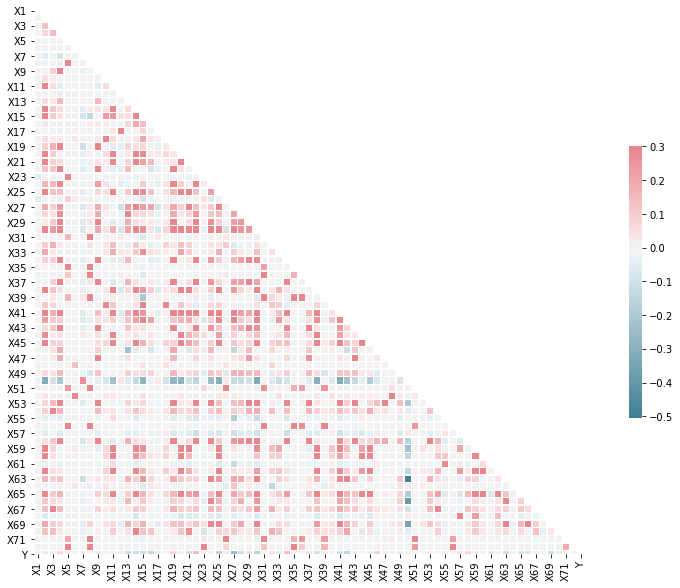

In [12]:
#correlation 数据可视化
corr = dataOrigin.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 处理缺失数据
每种处理方式新建一个cell，适当备注

In [13]:
#获得每列数据的缺失个数
dataTest = dataOrigin
missing_values_count = dataTest.isnull().sum()
#查看所有数据的缺失情况
missing_values_count 

X1     5851
X2      390
X3      817
X4     4280
X5     8891
       ... 
X70     390
X71    8127
X72    8891
Y         0
id        0
Length: 74, dtype: int64

In [14]:
#默认值填充
#缺失值填充为-1
dataTest.fillna(-1,inplace=True)
#将所有值为-1的数据替换为np.NaN
dataTest.replace(to_replace=-1,value=np.NaN,inplace =True)

In [15]:
dataTest

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6.0,553.0,326.0,NaN,NaN,3000.0,NaN,NaN,NaN,0.0,...,265.0,NaN,81.0,53.0,NaN,5.0,NaN,NaN,0,49995
49996,5.0,702.0,229.0,15.0,0.0,5000.0,0.0,NaN,4.0,0.0,...,132.0,702.0,38.0,83.0,955.0,6.0,0.0,0.0,0,49996
49997,6.0,882.0,196.0,6.0,NaN,20000.0,0.0,NaN,0.0,20300.0,...,140.0,444.0,32.0,73.0,617.0,5.0,NaN,NaN,0,49997
49998,10.0,1041.0,3410.0,4.0,0.0,4990.0,0.0,NaN,1.0,6324.0,...,12.0,911.0,568.0,60.0,2214.0,6.0,0.0,0.0,0,49998


In [16]:
#平均值填充
#对于某些数值属性例如X2，可用全部样本该列的平均值来填充
dataTest.X2.fillna(dataTest.X2.mean(),inplace=True)

In [17]:
dataTest

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
0,9.0,1458.0,17147.0,10.0,0.0,800.0,0.0,NaN,0.0,679.0,...,7.0,581.0,2449.0,93.0,498.0,6.0,0.0,0.0,1,0
1,2.0,250.0,38.0,6.0,NaN,10000.0,0.0,NaN,1.0,12990.0,...,31.0,796.0,7.0,122.0,406.0,5.0,NaN,NaN,1,1
2,2.0,1054.0,178.0,1.0,0.0,1000.0,0.0,NaN,1.0,18710.0,...,230.0,732.0,29.0,78.0,10.0,6.0,0.0,0.0,0,2
3,10.0,1398.0,679.0,7.0,0.0,10000.0,0.0,NaN,1.0,19010.0,...,11.0,36.0,113.0,82.0,35.0,6.0,0.0,0.0,1,3
4,2.0,1095.0,305.0,11.0,0.0,10000.0,0.0,NaN,2.0,16410.0,...,93.0,395.0,50.0,48.0,491.0,5.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6.0,553.0,326.0,NaN,NaN,3000.0,NaN,NaN,NaN,0.0,...,265.0,NaN,81.0,53.0,NaN,5.0,NaN,NaN,0,49995
49996,5.0,702.0,229.0,15.0,0.0,5000.0,0.0,NaN,4.0,0.0,...,132.0,702.0,38.0,83.0,955.0,6.0,0.0,0.0,0,49996
49997,6.0,882.0,196.0,6.0,NaN,20000.0,0.0,NaN,0.0,20300.0,...,140.0,444.0,32.0,73.0,617.0,5.0,NaN,NaN,0,49997
49998,10.0,1041.0,3410.0,4.0,0.0,4990.0,0.0,NaN,1.0,6324.0,...,12.0,911.0,568.0,60.0,2214.0,6.0,0.0,0.0,0,49998


In [18]:
#删除不完整的行
#删除任何包含空值的行
dataTest.dropna(inplace = True)
#删除所有值都为空值的行
dataTest.dropna(how='all',inplace = True)
#删除至少有五个为空值的行
dataTest.dropna(thresh=5 ,inplace = True)
#去除label为空的行
dataTest.dropna(subset=['Y'] ,inplace = True)

In [19]:
dataTest

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X65,X66,X67,X68,X69,X70,X71,X72,Y,id
33,2.0,668.0,113.0,7.0,1048576.0,20000.0,0.0,3145728.0,2.0,11900.0,...,110.0,281.0,18.0,49.0,447.0,6.0,1597992.0,381525.0,0,33
170,6.0,2089.0,684.0,4.0,614400.0,5000.0,0.0,11400.0,0.0,3000.0,...,173.0,866.0,114.0,100.0,1092.0,6.0,0.0,614400.0,0,170
573,6.0,1309.0,31.0,11.0,5345280.0,10000.0,0.0,30000.0,4.0,14060.0,...,352.0,855.0,5.0,62.0,882.0,6.0,337356.0,2655573.0,1,573
663,2.0,146.0,187.0,1.0,3072.0,3000.0,0.0,700.0,0.0,25900.0,...,146.0,656.0,187.0,61.0,31.0,6.0,3072.0,3072.0,1,663
3879,1.0,485.0,29.0,2.0,1830635.0,5000.0,0.0,30000.0,1.0,17165.0,...,52.0,247.0,9.0,134.0,44.0,6.0,2281123.0,1266909.0,1,3879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48751,11.0,1776.0,113.0,8.0,4194304.0,5000.0,0.0,36000.0,1.0,15000.0,...,185.0,1036.0,18.0,62.0,1320.0,6.0,4192235.0,3162794.0,0,48751
48775,4.0,475.0,233.0,11.0,4194304.0,5000.0,0.0,42000.0,2.0,43710.0,...,23.0,851.0,38.0,157.0,252.0,6.0,8676452.0,3495253.0,0,48775
49630,11.0,761.0,3.0,8.0,1024.0,10000.0,0.0,300.0,0.0,11900.0,...,119.0,894.0,3.0,79.0,404.0,6.0,0.0,1024.0,0,49630
49821,8.0,2641.0,154.0,17.0,24000.0,3000.0,0.0,60000.0,6.0,21100.0,...,118.0,198.0,25.0,39.0,96.0,6.0,6.0,8333.0,0,49821


## 数据变换与离散化
适当备注：变换方式，变换参数...

### 1. 缩放(Scaling)

In [20]:
#找到所有数值属性
numeric_feats = dataTest.dtypes[dataTest.dtypes != "object"].index

In [21]:
#使用最大最小值规范化
dataTest[numeric_feats] = dataTest[numeric_feats].apply(lambda x: (x - x.min()) / (x.max() -
x.min()))

### 2. 规范化(Normalization)

In [22]:
#使用零均值规范化
dataTest[numeric_feats] = dataTest[numeric_feats].apply(lambda x: (x - x.mean()) / (x.std()))

### 3. 离散化(Discretization)
说明分箱方式、分享数量等

In [23]:
#等深分箱
dataTest.X65_bin = pd.qcut(dataTest.X65, q=10, duplicates='drop')
dataTest.X65_bin

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


33        (-0.339, -0.12]
170        (0.127, 0.436]
573         (1.037, 4.62]
663        (-0.12, 0.127]
3879     (-0.584, -0.486]
               ...       
48751      (0.127, 0.436]
48775    (-0.771, -0.675]
49630      (-0.12, 0.127]
49821      (-0.12, 0.127]
49983    (-0.771, -0.675]
Name: X65, Length: 97, dtype: category
Categories (10, interval[float64]): [(-0.819, -0.771] < (-0.771, -0.675] < (-0.675, -0.584] < (-0.584, -0.486] ... (-0.12, 0.127] < (0.127, 0.436] < (0.436, 1.037] < (1.037, 4.62]]

In [24]:
#等宽分箱
dataTest.X66_bin = pd.cut(dataTest.X66, bins=[100,200,300,400,500,600])
dataTest.X66_bin

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## 特征构造(交叉)
说明源特征、交叉方式等

In [25]:
def add_cross_feature(data, feature_1, feature_2):
 #合成两个不同的特征
 comb_index = data[[feature_1, feature_2]].drop_duplicates()
 #创建comb_index表
 comb_index表[feature_1 + '_' + feature_2] = np.arange(comb_index.shape[0])
 #comb_index拼接的左侧DataFrame对象data
 data = pd.merge(data, comb_index, 'left', on=[feature_1, feature_2])
 return data

## 数据集切分

In [26]:
num_train = int(dataOrigin.shape[0] * 0.8)
train_data = dataOrigin[:num_train]
test_data = dataOrigin[num_train:]
train_data.shape, test_data.shape

((77, 74), (20, 74))